In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15, 5]

import numpy as np

import os
import sys

import yaml

import PhyPraKit as ppk

import pandas as pd
notebook_path = os.path.abspath('')
project_root = os.path.dirname(notebook_path)
sys.path.append(project_root)

#from modules.analyzers import *
#from helpers.read_tar_parquet_to_df import process_parquet_files_from_tar

colors ={'ch1':'tab:blue','ch2':'tab:orange'}


In [2]:
hist_pv_ch1 = np.loadtxt('./3_7_hist/ch1_Ge.hst')
hist_pv_ch2 = np.loadtxt('./3_7_hist/ch2_Na.hst')

hist_pv_ch1 = hist_pv_ch1
hist_pv_ch2 = hist_pv_ch2


max_channel=len(hist_pv_ch1)

bins=np.linspace(0,max_channel-1,max_channel)
bins_np=np.linspace(0,max_channel,max_channel+1)
ticks=np.linspace(0,4000,16+1)


hist_my_ch1, bins_my_ch1 = np.histogram(pd.read_csv('analyzed_pulses/ch1_pulses_pvlike.txt',delimiter='	')['ch1_height'],bins=bins_np)
hist_my_ch2, bins_my_ch2 = np.histogram(-pd.read_csv('analyzed_pulses/ch2_minimum.txt',delimiter='	')['ch2_height'],bins=bins_np)

hist_my_ch1[0:500] = 0
hist_my_ch2[0:500] = 0

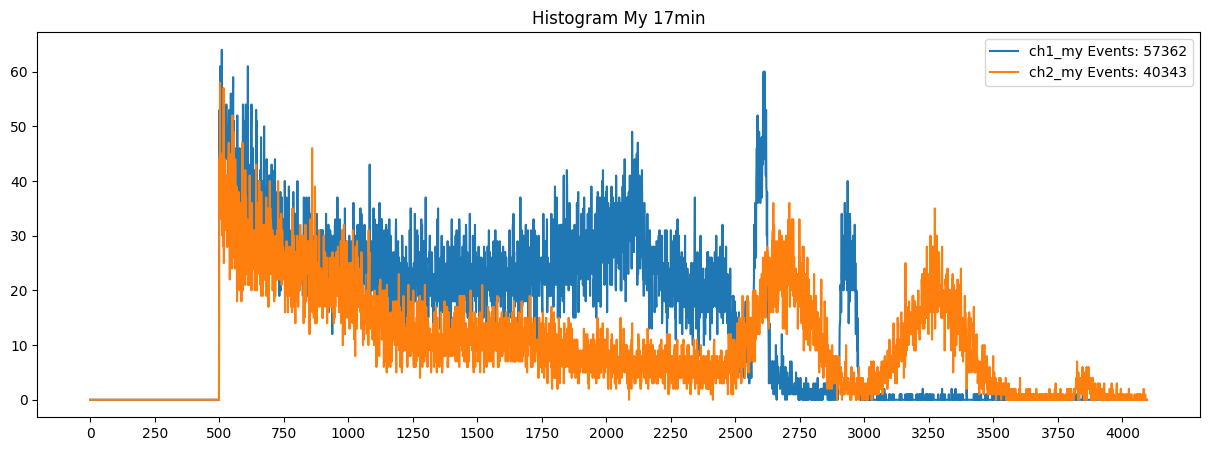

In [3]:
plt.plot(bins, hist_my_ch1, label='ch1_my Events: '+str(np.sum(hist_my_ch1)), color=colors['ch1'])
plt.plot(bins, hist_my_ch2, label='ch2_my Events: '+str(np.sum(hist_my_ch2)), color=colors['ch2'])
plt.title("Histogram My 17min")
plt.xticks(ticks)
plt.legend()
plt.show()

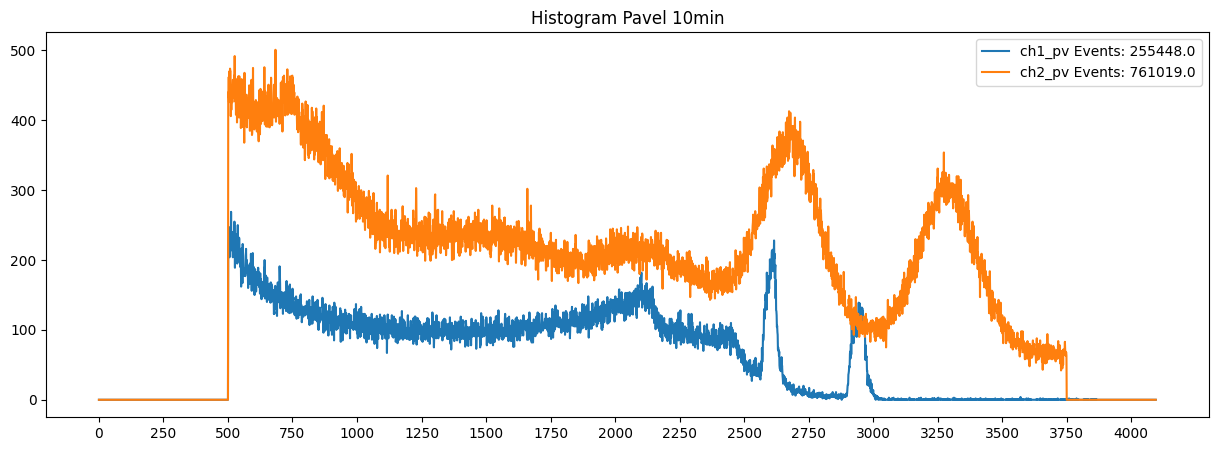

In [4]:
plt.plot(bins, hist_pv_ch1, label='ch1_pv Events: '+str(np.sum(hist_pv_ch1)), color=colors['ch1'])
plt.plot(bins, hist_pv_ch2, label='ch2_pv Events: '+str(np.sum(hist_pv_ch2)), color=colors['ch2'])
plt.legend()
plt.title("Histogram Pavel 10min")
plt.xticks(ticks)
plt.show()

#fullwidth half maximum vergleichen


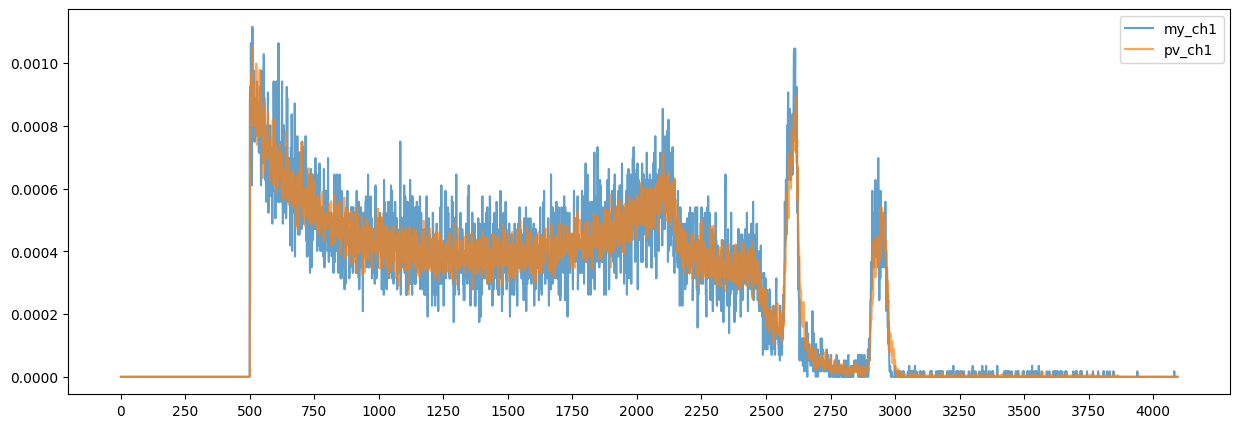

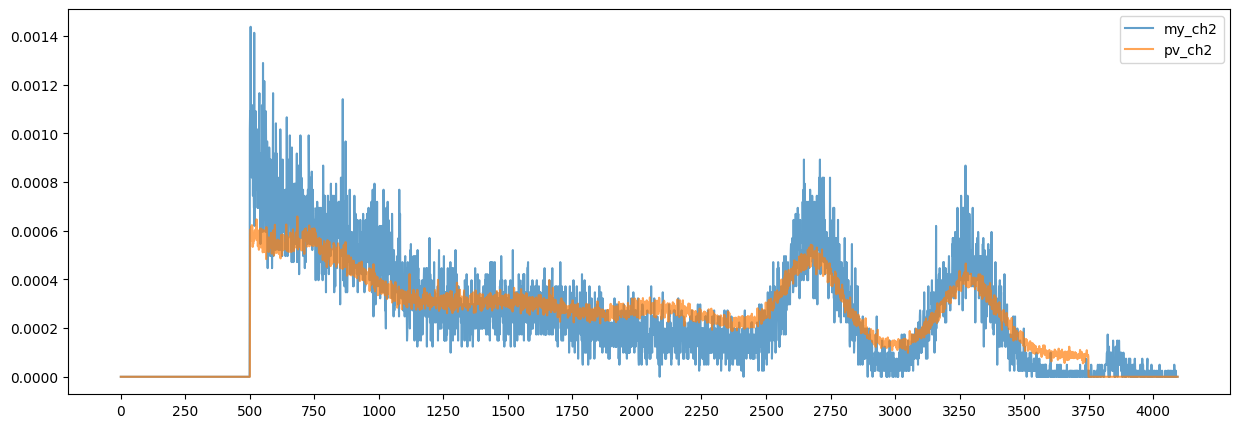

In [5]:
norm_my_ch1 = hist_my_ch1/np.sum(hist_my_ch1)
norm_my_ch2 = hist_my_ch2/np.sum(hist_my_ch2)

norm_pv_ch1 = hist_pv_ch1/np.sum(hist_pv_ch1)
norm_pv_ch2 = hist_pv_ch2/np.sum(hist_pv_ch2)

plt.plot(bins,norm_my_ch1,alpha=.7,label="my_ch1")
plt.plot(bins,norm_pv_ch1,alpha=.7,label="pv_ch1")
plt.xticks(ticks)
plt.legend()
plt.show()

plt.plot(bins,norm_my_ch2,alpha=.7,label="my_ch2")
plt.plot(bins,norm_pv_ch2,alpha=.7,label="pv_ch2")
plt.xticks(ticks)
plt.legend()
plt.show()


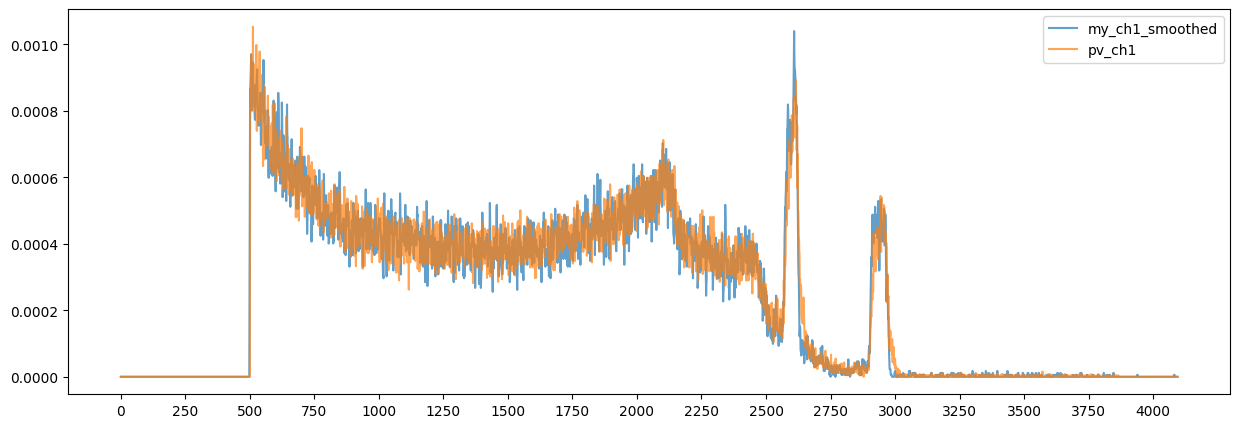

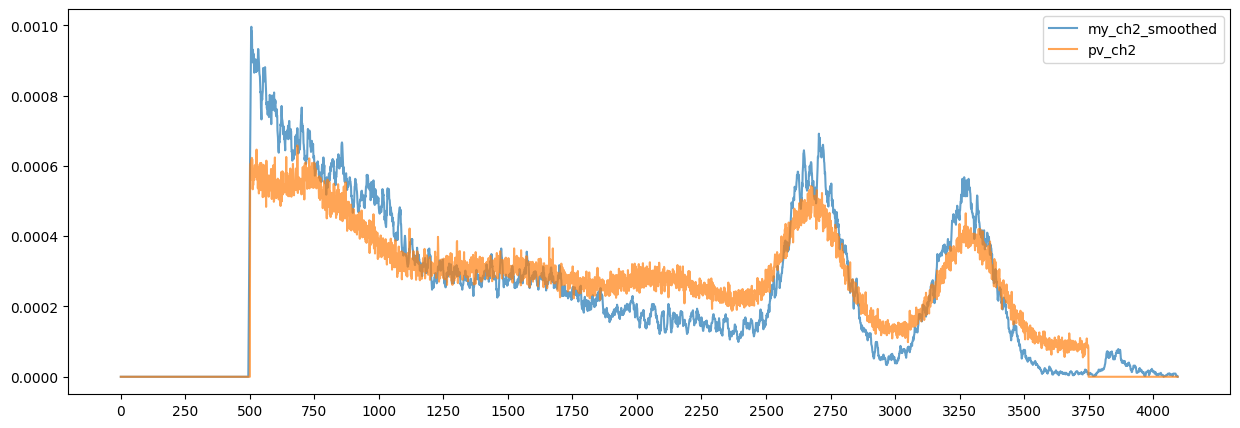

In [6]:
smoothed_my_ch1 = ppk.meanFilter(hist_my_ch1, width=2)
smoothed_my_ch2 = ppk.meanFilter(hist_my_ch2, width=10)

smoothed_norm_my_ch1 = smoothed_my_ch1/np.sum(smoothed_my_ch1)
smoothed_norm_my_ch2 = smoothed_my_ch2/np.sum(smoothed_my_ch2)

plt.plot(bins,smoothed_norm_my_ch1,alpha=.7,label="my_ch1_smoothed")
plt.plot(bins,norm_pv_ch1,alpha=.7,label="pv_ch1")
plt.xticks(ticks)
plt.legend()
plt.show()

plt.plot(bins,smoothed_norm_my_ch2,alpha=.7,label="my_ch2_smoothed")
plt.plot(bins,norm_pv_ch2,alpha=.7,label="pv_ch2")
plt.xticks(ticks)
plt.legend()
plt.show()


# Ergebnis der Analyse

Pavel und meine Analyse ergibt ein ähnliches Spektrum mit ungefähr gleicher Auflösung.

Komischerweise musste ich auf ch2 das minimum des undershoots verwenden (np.min(data)), evtl kann der Untergrund verringert werden, wenn auch hier ein Peakfinder verwendet wird bzw. optimalerweise natürlich der Peak selber und nicht der undershoot.

Da der coincidence Filter automatisch die Clippings rausgefiltert hat, findet man im Channel2 mit dieser Methode die Peaks nicht, da alle bei denen der Unterschwinger im Peak Bereich liegen immer Clippen.


Die Raten wirken komisch

|  | Pavel | Mimocorb | Verhältnis |
|----------|----------|----------|--|
| Ch1   |   425.7   |   56.2   |8|
| Ch2   |   1268.4   |   39.5   |32|
